## Problemset 5

### Kris Nichols

### Part One

### A) 

In [80]:
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from pylab import rcParams
from scipy.interpolate import LSQUnivariateSpline
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut, KFold

import numpy as np
%matplotlib inline

In [81]:
# Load Data
wines = pd.read_csv('strongdrink.txt')

X = wines[['alco', 'malic', 'tot_phen', 'color_int']]
Y = wines[['cultivar']]

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25,
                                                    random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')

result = MultLogReg.fit(X_train, Y_train)

In [83]:
print('J=1:')
print(' b0 =', result.intercept_[0], '   b1 =', result.coef_[0][0],
      'b2 =', result.coef_[0][1], ' b3 =', result.coef_[0][2],
      '  b4 =', result.coef_[0][3])
print('\nJ=2:')
print(' b0 =', result.intercept_[1], '   b1 =', result.coef_[1][0],
      'b2 =', result.coef_[1][1], '  b3 =', result.coef_[1][2],
      '  b4 =', result.coef_[1][3])

J=1:
 b0 = -24.0109894515    b1 = 1.7004033763 b2 = -0.265605226518  b3 = 1.2238937289   b4 = 0.0227563746875

J=2:
 b0 = 22.8024461982    b1 = -1.46804431964 b2 = -0.333053122096   b3 = 0.664011854001   b4 = -0.922712234869


In [84]:
Y_pred_1 = MultLogReg.predict(X_test)
print(classification_report(Y_test, Y_pred_1))
# print(classification_report(y_test, y_pred))
print (f'The error rate for j=1 is {1-0.87} and the error rate for j=2 is 1.')
print(f'Validation set MSE = {mean_squared_error(Y_test, Y_pred_1)}')

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

The error rate for j=1 is 0.13 and the error rate for j=2 is 1.
Validation set MSE = 0.045454545454545456


J = 2 has a perfect precision value of 1

### B)

In [85]:
Xvars = wines[['alco', 'malic', 'tot_phen', 'color_int']].values
yvals = wines['cultivar'].values
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
N_loo = Xvars.shape[0]
MSE = pd.DataFrame({'index': np.zeros(N_loo), 
                    'error': np.zeros(N_loo), 
                    'Y_pred': np.zeros(N_loo),
                    'Y_test': np.zeros(N_loo)})

In [86]:
for train_index, test_index in loo.split(Xvals):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    Y_train, Y_test = Yvals[train_index], Yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, Y_train)
    Y_pred = LogReg.predict(X_test)
    MSE['index'][test_index] = test_index
    MSE['error'][test_index] = (((Y_test - Y_pred) ** 2) != 0).astype(int)
    MSE['Y_pred'][test_index] = Y_pred
    MSE['Y_test'][test_index] = Y_test

In [101]:
error_1 = MSE[MSE['Y_pred'] == 1]['error'].mean()
error_2 = MSE[MSE['Y_pred'] == 2]['error'].mean()
error_3 = MSE[MSE['Y_pred'] == 3]['error'].mean()
General_MSE = MSE['error'].mean()


print(classification_report(MSE['Y_test'], MSE['Y_pred'], digits=3))
print('Error rate class 1:', error_1, ', STD is', MSE[MSE['Y_pred'] == 1]['error'].std())
print('Error rate class 2:', error_2, ', STD is', MSE[MSE['Y_pred'] == 2]['error'].std())
print('Error rate class 3:', error_3, ', STD is', MSE[MSE['Y_pred'] == 3]['error'].std())
print('Average MSE all:', General_MSE,
      ', std is', MSE['error'].std())

             precision    recall  f1-score   support

        1.0      0.902     0.932     0.917        59
        2.0      0.914     0.901     0.908        71
        3.0      0.956     0.935     0.945        46

avg / total      0.921     0.920     0.921       176

Error rate class 1: 0.09836065573770492 , STD is 0.3002730997379377
Error rate class 2: 0.08571428571428572 , STD is 0.2819629507400967
Error rate class 3: 0.044444444444444446 , STD is 0.20840907713999288
Average MSE all: 0.07954545454545454 , std is 0.2713602101199873


### C)

In [88]:
k=4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)
MSE_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    print(classification_report(y_test, y_pred))
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()

k index= 0
MSE for test set 0  is 0.159090909091
             precision    recall  f1-score   support

          1       0.71      1.00      0.83        12
          2       1.00      0.75      0.86        24
          3       0.78      0.88      0.82         8

avg / total       0.88      0.84      0.84        44

k index= 1
MSE for test set 1  is 0.113636363636
             precision    recall  f1-score   support

          1       1.00      0.76      0.87        17
          2       0.69      1.00      0.81        11
          3       1.00      0.94      0.97        16

avg / total       0.92      0.89      0.89        44

k index= 2
MSE for test set 2  is 0.0454545454545
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        15
          2       0.94      0.94      0.94        16
          3       1.00      0.92      0.96        13

avg / total       0.96      0.95      0.95        44

k index= 3
MSE for test set 3  is 0.045454545454

In [102]:
print('Test estimate MSE k-fold:', MSE_kf,
      '\nTest estimate MSE standard error:', MSE_kf_std)

print('\nError rate Class 1: ', 1- (0.71 + 1.00 + 0.94 + 0.88)/4)
print('Error rate Class 2: ', 1- (1.00 + 0.69 + 0.94 + 1.00)/4)
print('Error rate Class 3: ', 1- (0.78 + 1.00 + 1.00 + 1.00)/4)

Test estimate MSE k-fold: 0.0909090909091 
Test estimate MSE standard error: 0.04821182599

Error rate Class 1:  0.11750000000000005
Error rate Class 2:  0.09250000000000003
Error rate Class 3:  0.05499999999999994


K-folds performed worse than both multinomial logistic regression and LOOCV. ALso, in K-folds the MSE is higher (.09 vs .07) than in the previous test.

### Part 2

### A)

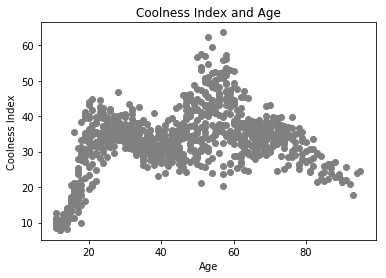

In [90]:
# Load Data
cooli = pd.read_csv('CoolIndex.txt', header = None)
cooli.columns = ['age', 'Coolness']
age = cooli['age']
coolness = cooli['Coolness']
age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

plt.scatter(age, coolness, color = 'grey')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index and Age')
plt.show()

### B)

In [91]:
age_11_22 = ((age >= 11) & (age < 22)).astype(int)
age_22_40 = ((age >= 22) & (age < 40)).astype(int)
age_40_59 = ((age >= 40) & (age < 59)).astype(int)
age_59_77 = ((age >= 59) & (age < 77)).astype(int)
age_77_95 = ((age >= 77) & (age <= 95) ).astype(int)
X_step = pd.DataFrame(dict(age_22_40=age_22_40, age_11_22=age_11_22,
                           age_40_59=age_40_59, age_59_77=age_59_77,
                           age_77_95=age_77_95))

reg2 = sm.OLS(endog=coolness, exog=X_step, missing='drop')
reg2_results = reg2.fit()
y_pred_1 = reg2_results.predict(X_step)
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:               Coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        07:10:27   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_11_22     20.1025      0.562     35.746      0.0

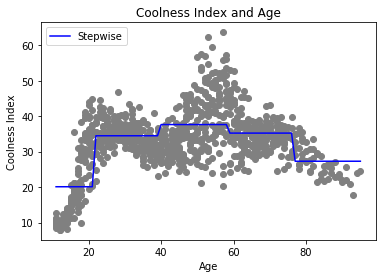

In [92]:
plt.scatter(age, coolness, label=None, color='grey')
plt.plot(cooli.age, y_pred_1, color = 'b', label='Stepwise')

plt.ylabel('Coolness Index')
plt.xlabel('Age')
plt.title('Coolness Index and Age')
plt.legend(loc='upper left')
plt.show()

In [93]:
b1, b2, b3, b4, b5 = reg2_results.params
print('b1 =', b1, ',b2 =', b2,
      '\nb3 =', b3, ',b4 =', b4,
      '\nb5 =', b5)

print('Predicted Coolness of 73-year old is', reg2_results.params[3])

b1 = 20.1024572521 ,b2 = 34.4757880776 
b3 = 37.6351054924 ,b4 = 35.2254000402 
b5 = 27.2963782443
Predicted Coolness of 73-year old is 35.2254000402


### C)

In [100]:
# Linear SPline

# Using UnivariateSPline function from SKlearn

knots = [22, 40, 59, 77]
spl_linear = LSQUnivariateSpline(age.values, coolness.values, knots, k=1)
y_pred_2 = spl_linear(age)

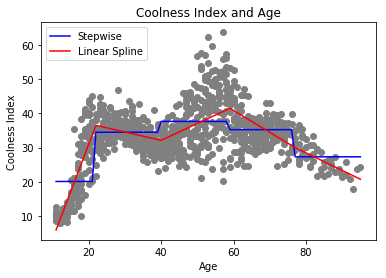

In [95]:
plt.scatter(age, coolness, label=None, color='grey')
plt.plot(cooli.age, y_pred_1, color = 'b', label='Stepwise')
plt.plot(cooli.age, y_pred_2, color = 'red', label='Linear Spline')

plt.ylabel('Coolness Index')
plt.xlabel('Age')
plt.title('Coolness Index and Age')
plt.legend(loc='upper left')
plt.show()

In [96]:
print('Predicted Coolness of 73-year old is', spl_linear(73))

Predicted Coolness of 73-year old is 32.536832389143306


### D)

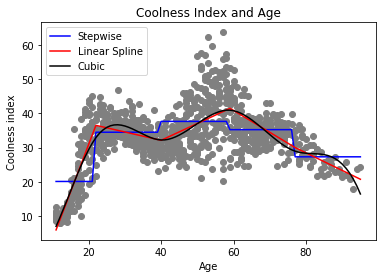

In [99]:
# Cubic Spline

# Using UnivariateSpline function
spl_cubic = LSQUnivariateSpline(age.values, coolness.values, knots, k=3)
y_pred_3 = spl_cubic(cooli.age)

plt.scatter(age, coolness, label=None, color='grey')
plt.plot(cool.age, y_pred_1, color = 'b',label='Stepwise')
plt.plot(cool.age, y_pred_2, color = 'red', label='Linear Spline')
plt.plot(cool.age, y_pred_3, color = 'black',label='Cubic')
plt.legend(loc='upper left')

plt.xlabel('Age')
plt.ylabel('Coolness index')
plt.title('Coolness Index and Age')
plt.show()

In [98]:
print('Predicted Coolness of 73-year old =', spl_cubic(73))

Predicted Coolness of 73-year old = 31.262429389257864
